In [75]:
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deep_translator import GoogleTranslator

In [74]:
def detectOneLine(image_path, language):
    reader = easyocr.Reader(['en'], gpu = False)
    result = reader.readtext(image_path)
    topLeft = tuple(result[0][0][0])
    bottomRight = tuple(result[0][0][2])
    text = result[0][1]
    translation = GoogleTranslator(source='auto', target=language).translate(text=text)
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.imread(image_path)
    img = cv2.rectangle(img, topLeft, bottomRight, (0,255,0), 5)
    img = cv2.putText(img, translation, topLeft, font, 0.5, (255,255,255),2, cv2.LINE_AA)
    plt.imshow(img)
    

In [65]:
def detectMultipleLines(image_path, language):
    reader = easyocr.Reader(['en'], gpu = False)
    result = reader.readtext(image_path)
    img = cv2.imread(image_path)
    for detection in result:
        top_left = tuple([int(val) for val in detection[0][0]])
        bottom_right = tuple([int(val) for val in detection[0][2]])
        text = detection[1]
        translation = GoogleTranslator(source='auto', target=language).translate(text=text)
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
        img = cv2.putText(img, translation, top_left, font,0.5,(255,0,255),1, cv2.LINE_AA)

    plt.figure(figsize = (10,10))
    plt.imshow(img)
    plt.show()

Using CPU. Note: This module is much faster with a GPU.


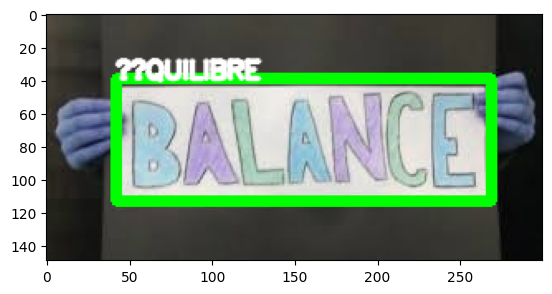

In [64]:
detectOneLine('Title.jpeg', 'fr')

Using CPU. Note: This module is much faster with a GPU.


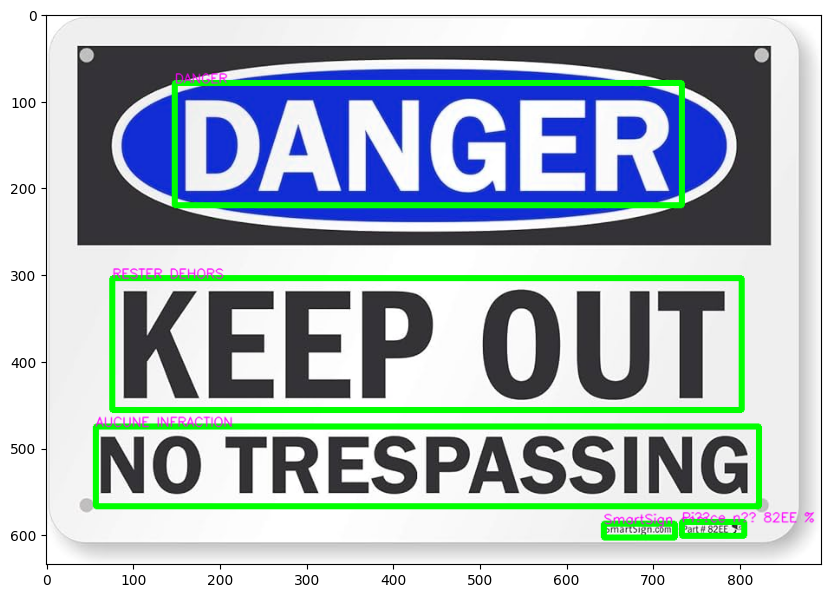

In [66]:
detectMultipleLines('DangerSign.jpg', 'fr')

Using CPU. Note: This module is much faster with a GPU.


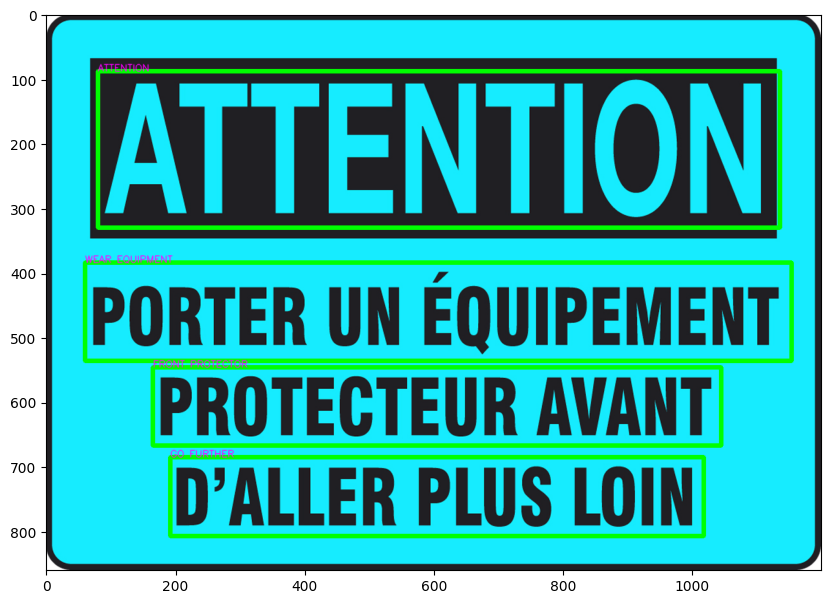

In [67]:
detectMultipleLines('DangerFrench.jpg', 'en')